In [1]:
!pip install opendatasets

In [3]:
import pandas as pd
import opendatasets as od

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [5]:
od.download("https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sandaludewthilini
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight


100%|██████████| 20.3k/20.3k [00:00<00:00, 8.22MB/s]

In [6]:
data = pd.read_csv("/content/male-female-height-and-weight/Test set.csv")

In [7]:
data.head(5)

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [8]:
data.loc[data['Sex'] == 'Male', 'Sex'] = 1
data.loc[data['Sex'] == 'Female', 'Sex'] = 0

In [9]:
data.head(5)

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [10]:
x = data.drop(['Sex'],axis=1)
y = data['Sex']

In [38]:
#normalized data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x=pd.DataFrame(x_scaled, columns=['Height', 'Weight'])


In [39]:
x.head(5)

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [40]:
y[:5]

,Sex
0,0
1,1
2,1
3,1
4,0


In [41]:
y = y.astype('int')

In [42]:
y.dtype

dtype('int64')

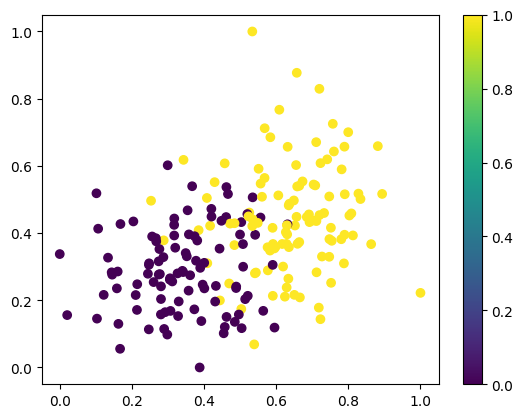

In [43]:
plt.scatter(x['Height'],x['Weight'], c=y)
plt.colorbar()
plt.show()


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [45]:
x_train.shape , x_test.shape

((164, 2), (41, 2))

In [46]:
data.shape


(205, 3)

#Model Building


In [47]:
#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

#compile model
model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(learning_rate = 0.005), # Changed lr to learning_rate
              metrics=['accuracy'])

#train model
epoch_number = 20
history = model.fit(x_train, y_train, epochs=epoch_number)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5483 - loss: 0.6690
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5319 - loss: 0.6331
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5728 - loss: 0.6165
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7158 - loss: 0.5706
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7440 - loss: 0.5436
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7912 - loss: 0.5073
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8341 - loss: 0.4679
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7951 - loss: 0.4551
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8788 - loss: 0.3973
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8962 - loss: 0.3311
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8509 - loss: 0.3415 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8480 - loss: 0.3205
Epoch 13/20


In [48]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,749 (14.65 KB)

 Trainable params: 1,249 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,500 (9.77 KB)

#Model Evaluate


In [49]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9141 - loss: 0.2368 


[0.251192182302475, 0.9024389982223511]

In [50]:
#precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, model.predict(x_test))
precision.result()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.8636363744735718>

In [51]:
#recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, model.predict(x_test))
recall.result()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.949999988079071>

In [52]:
history.history

{'accuracy': [0.5243902206420898,
  0.5243902206420898,
  0.5853658318519592,
  0.7012194991111755,
  0.7439024448394775,
  0.7987805008888245,
  0.8292682766914368,
  0.8414633870124817,
  0.8597561120986938,
  0.8597561120986938,
  0.8597561120986938,
  0.8536585569381714,
  0.8536585569381714,
  0.8658536672592163,
  0.8536585569381714,
  0.8597561120986938,
  0.8597561120986938,
  0.8658536672592163,
  0.8475610017776489,
  0.8780487775802612],
 'loss': [0.6679983139038086,
  0.6387678980827332,
  0.6105439066886902,
  0.5792754292488098,
  0.5423809885978699,
  0.5048278570175171,
  0.4624485969543457,
  0.41702190041542053,
  0.39307621121406555,
  0.36023667454719543,
  0.33183303475379944,
  0.3136711120605469,
  0.3159548044204712,
  0.2976941168308258,
  0.2882668375968933,
  0.28740665316581726,
  0.29430893063545227,
  0.294941246509552,
  0.2990005910396576,
  0.27488505840301514]}

In [53]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.524390,0.667998
1,0.524390,0.638768
2,0.585366,0.610544
3,0.701219,0.579275
4,0.743902,0.542381
5,0.798781,0.504828
6,0.829268,0.462449
7,0.841463,0.417022
8,0.859756,0.393076
9,0.859756,0.360237


<Axes: >

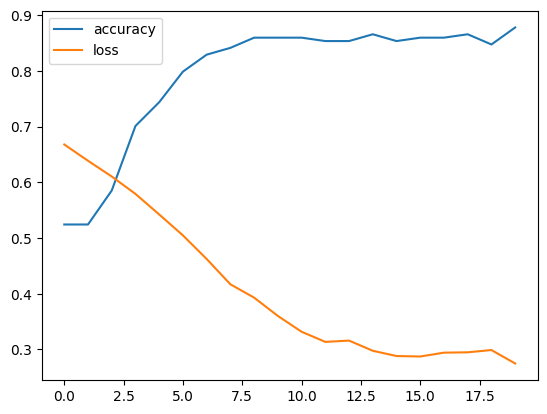

In [54]:
pd.DataFrame(history.history).plot()